# 가격별 조회수와 누적판매량

In [9]:
import sys
import seaborn as sb
import pandas as pd
import numpy as np
from pandas import read_excel, DataFrame, pivot_table, melt, crosstab
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from labelencoder import LabelEncoder

In [2]:
plt.rcParams["font.family"] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams["font.size"] = 12
plt.rcParams["figure.figsize"] = (12, 6)
plt.rcParams['axes.unicode_minus'] = False

In [3]:
origin = read_excel('MusinsaSampleData_age.xlsx')
origin

,상품명,종류,분류,성별,조회수,누적판매,선호연령,선호연령비율_x,선호성별,남자선호비율,...,상품가격,제품소재,색상,선호연령비율_y,~18세,19~23세,24~28세,29~33세,34~39세,40세~
0,와이드 데님 팬츠 [그레이],바지,데님 팬츠,"남성, 여성",144000,8500,"23세 이하,","['~18세42,19~23세21,24~28세12,29~33세7,34~39세4,40세...",남성,0.75,...,21200.0,COTTON 100%,"BLACK, GRAY, RAW DENIM, MEDIUM BLUE","[42, 21, 12, 7, 4, 14]",42.0,21.0,12.0,7.0,4.0,14.0
1,1992 오버핏 스웨트셔츠 화이트멜란지,상의,맨투맨/스웨트셔츠,NaN,1400,163,0,"['~18세49,19~23세3,24~28세6,29~33세10,34~39세9,40세~...",NaN,0.49,...,36900.0,상세페이지 참조,상세페이지 참조,"[49, 3, 6, 10, 9, 23]",49.0,3.0,6.0,10.0,9.0,23.0
2,핸드볼 스페지알 - 핑크 / IF6561,스니커즈,패션스니커즈화,"남성, 여성",79000,1600,"24 33세,","['~18세18,19~23세16,24~28세24,29~33세18,34~39세11,4...",여성,0.34,...,139000.0,상품 Tag 참고,핑크,"[18, 16, 24, 18, 11, 13]",18.0,16.0,24.0,18.0,11.0,13.0
3,베이직 푸퍼_SPJPE11C11,아우터,숏패딩/숏헤비 아우터,남성,608000,75000,"19 28세,","['~18세57,19~23세14,24~28세10,29~33세6,34~39세4,40세...",남성,0.73,...,62910.0,겉감 폴리에스터100%안감 폴리에스터100%,"(10)WHITE,(15)GRAY,(16)LIGHT GRAY,(19)BLACK,(3...","[57, 14, 10, 6, 4, 9]",57.0,14.0,10.0,6.0,4.0,9.0
4,워셔블 아란 케이블 후드 집업 니트 (IVORY),상의,니트/스웨터,"남성, 여성",186000,4600,"19 28세,","['~18세24,19~23세27,24~28세23,29~33세10,34~39세5,40...",여성,0.36,...,39900.0,Acryl 80%Nylon 20%,아이보리,"[24, 27, 23, 10, 5, 11]",24.0,27.0,23.0,10.0,5.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,남성드레스셔츠 네이비 솔리드 슬림핏 1THTHA4MSU105,상의,셔츠/블라우스,NaN,40,0,0,['~18세19~23세24~28세29~33세34~39세40세~'],NaN,0.92,...,35000.0,"폴리에스터 45%, 면 55%",파란색,[],NaN,NaN,NaN,NaN,NaN,NaN
7658,컬러 블록 후드 블랙,상의,후드 티셔츠,NaN,314,0,0,"['~18세21,19~23세20,24~28세6,29~33세18,34~39세9,40세...",NaN,0.40,...,31000.0,상품 상세설명 참조,블랙,"[21, 20, 6, 18, 9, 26]",21.0,20.0,6.0,18.0,9.0,26.0
7659,X 버클캡 [그린],모자,캡/야구 모자,공용,700,150,"29 39세,","['~18세26,19~23세11,24~28세11,29~33세17,34~39세13,4...",남성,0.62,...,35100.0,상세페이지 참조,Cotton 100%,"[26, 11, 11, 17, 13, 22]",26.0,11.0,11.0,17.0,13.0,22.0
7660,X 버클캡 [베이지],모자,캡/야구 모자,공용,900,200,"24 33세,","['~18세38,19~23세13,24~28세14,29~33세16,34~39세10,4...",남성,0.50,...,35100.0,상세페이지 참조,Cotton 100%,"[38, 13, 14, 16, 10, 9]",38.0,13.0,14.0,16.0,10.0,9.0


In [4]:
prices = origin.filter(['종류','누적판매','상품가격','선호연령','선호성별'])
prices

,종류,누적판매,상품가격,선호연령,선호성별
0,바지,8500,21200.0,"23세 이하,",남성
1,상의,163,36900.0,0,NaN
2,스니커즈,1600,139000.0,"24 33세,",여성
3,아우터,75000,62910.0,"19 28세,",남성
4,상의,4600,39900.0,"19 28세,",여성
...,...,...,...,...,...
7657,상의,0,35000.0,0,NaN
7658,상의,0,31000.0,0,NaN
7659,모자,150,35100.0,"29 39세,",남성
7660,모자,200,35100.0,"24 33세,",남성


In [5]:
prices_df = prices.dropna()
prices_df = prices_df[prices_df != 0 ] 
prices_df

,종류,누적판매,상품가격,선호연령,선호성별
0,바지,8500.0,21200.0,"23세 이하,",남성
2,스니커즈,1600.0,139000.0,"24 33세,",여성
3,아우터,75000.0,62910.0,"19 28세,",남성
4,상의,4600.0,39900.0,"19 28세,",여성
5,스니커즈,15000.0,139000.0,"24 33세,",여성
...,...,...,...,...,...
7646,상의,50.0,65000.0,"24 33세,",남성
7648,모자,300.0,25600.0,"24 33세,",남성
7656,아우터,150.0,35400.0,"19 23세,",남성
7659,모자,150.0,35100.0,"29 39세,",남성


In [6]:
prices_df.value_counts()

종류      누적판매      상품가격     선호연령     선호성별
상의      50.0      15900.0  40세 이상,  여성      4
스포츠/용품  50.0      29000.0  24 28세,  여성      3
바지      150.0     43400.0  19 28세,  남성      3
상의      250.0     43900.0  23세 이하,  남성      3
        50.0      55300.0  24 33세,  남성      3
                                           ..
뷰티      7400.0    22620.0  19 28세,  남성      1
        7000.0    26900.0  24 33세,  여성      1
        6700.0    19800.0  24 33세,  여성      1
        6100.0    23900.0  29 39세,  남성      1
컬처      500000.0  36900.0  19 28세,  남성      1
Name: count, Length: 5997, dtype: int64

In [7]:
label_encoder = LabelEncoder(prices_df)
select = ['종류','선호성별']
label_df = label_encoder.labelling(select)
label_df

[종류]
['가방', '리빙', '모자', '바지', '반려동물', '뷰티', '상의', '선글라스/안경테', '속옷', '스니커즈', '스커트', '스포츠/용품', '시계', '신발', '아우터', '액세서리', '양말/레그웨어', '여성 가방', '원피스', '주얼리', '컬처']
	'가방': 0
	'리빙': 1
	'모자': 2
	'바지': 3
	'반려동물': 4
	'뷰티': 5
	'상의': 6
	'선글라스/안경테': 7
	'속옷': 8
	'스니커즈': 9
	'스커트': 10
	'스포츠/용품': 11
	'시계': 12
	'신발': 13
	'아우터': 14
	'액세서리': 15
	'양말/레그웨어': 16
	'여성 가방': 17
	'원피스': 18
	'주얼리': 19
	'컬처': 20
{'가방': 0, '리빙': 1, '모자': 2, '바지': 3, '반려동물': 4, '뷰티': 5, '상의': 6, '선글라스/안경테': 7, '속옷': 8, '스니커즈': 9, '스커트': 10, '스포츠/용품': 11, '시계': 12, '신발': 13, '아우터': 14, '액세서리': 15, '양말/레그웨어': 16, '여성 가방': 17, '원피스': 18, '주얼리': 19, '컬처': 20}
[선호성별]
['남성', '여성']
	'남성': 0
	'여성': 1
{'남성': 0, '여성': 1}


,종류,누적판매,상품가격,선호연령,선호성별
0,3,8500.0,21200.0,"23세 이하,",0
2,9,1600.0,139000.0,"24 33세,",1
3,14,75000.0,62910.0,"19 28세,",0
4,6,4600.0,39900.0,"19 28세,",1
5,9,15000.0,139000.0,"24 33세,",1
...,...,...,...,...,...
7646,6,50.0,65000.0,"24 33세,",0
7648,2,300.0,25600.0,"24 33세,",0
7656,14,150.0,35400.0,"19 23세,",0
7659,2,150.0,35100.0,"29 39세,",0


In [16]:
label_df.describe()

,종류,누적판매,상품가격,선호성별
count,6146.000000,6130.000000,6140.000000,6146.000000
mean,7.377481,54897.079772,50254.029479,0.433778
std,4.778414,153216.860884,39435.529644,0.495636
min,0.000000,11.000000,3000.000000,0.000000
25%,3.000000,150.000000,29400.000000,0.000000
50%,6.000000,650.000000,41800.000000,0.000000
75%,11.000000,2900.000000,58925.000000,1.000000
max,20.000000,500000.000000,790000.000000,1.000000


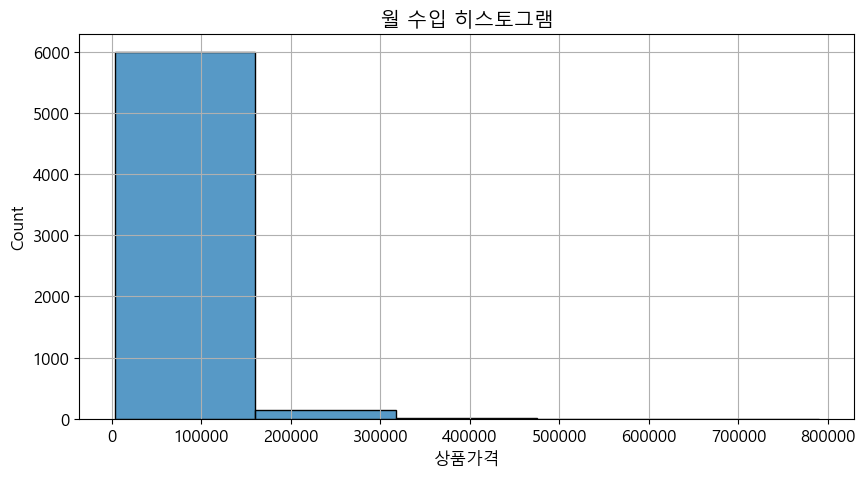

In [12]:
plt.figure(figsize=(10, 5), dpi=100)
sb.histplot(data=label_df, x='상품가격', bins=5)
plt.grid()
plt.title("월 수입 히스토그램")
plt.show()
plt.close()